<img src="./img/HWNI_logo.svg"/>

# Tutorial - ANOVA by Hand

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import util.utils as utils
import util.shared as shared

shared.format_plots()
shared.format_dataframes()

In this tutorial, we will learn about the
[ANalysis Of VAriance](https://en.wikipedia.org/wiki/Analysis_of_variance)
model by walking through a by-hand implementation of it
in its simplest form:
the One-Way ANOVA.

In all of its forms,
ANOVA works by "partitioning" the variance in an observation
into different components.
According to our null hypothesis,
most partitions of the data don't reduce the variance very much,
so if,
once we've partitioned data according to the factors we're interested in,
the variance is greatly decreased,
then something unlikely has occurred under our null hypothesis
and we may have found an effect.

Below, we make these statements rigorous on a toy dataset
and then apply a One-Way ANOVA to a real neuroscience dataset.

# Introducing Analysis of Variance

Following Wikipedia's
[motivating example](https://en.wikipedia.org/wiki/Analysis_of_variance#Motivating_example),
we consider what might happen if we were to collect some information
about a collection of dogs.

This collection of dogs has two breeds,
each of which comes in a long-haired and a short-haired variety.
We measure the weight of each dog,
taking care to note its breed and hair length,
and collect that information into a dataframe.

In [2]:
N = 50

dogs = utils.produce_dog_dataframe(N, weight_effect = 5)
dogs.sample(5)

,breed,weight,hair_length
2,0,9.709527,0
84,1,16.422800,0
86,1,12.291122,1
90,1,16.411397,1
69,1,16.480608,1


As always,
we begin by visualizing our data.
Here, we choose a histogram.
We also calculate a summary statistic --
since we'll need it later,
we look at the variance.

For all observations, variance is 7.87


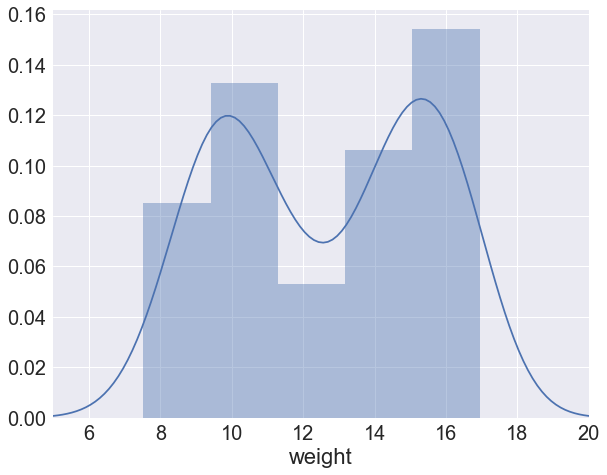

In [3]:
utils.plot_data(dogs, "weight")

It appears that,
as far as weight is concerned,
there are only two kinds of dogs,
not four:
the histogram has two "clusters"
and the kernel density estimate has two peaks.

Intuitively,
we might guess that breed is more likely
to have a large effect on weight
than is hair length.

To determine whether this is the case,
we split our data up,
first by breed and then by hair length,
and make the same plots as before.

For all data, variance is 7.87
For Breed 0, variance is 1.62
For Breed 1, variance is 1.16


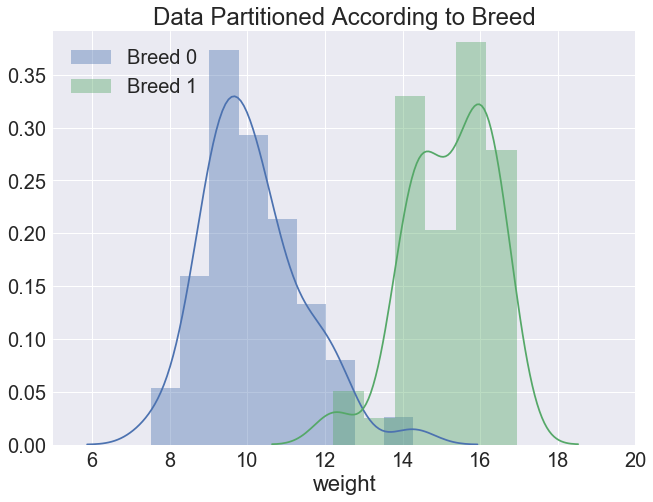

In [4]:
utils.plot_partition(dogs, "breed", "weight" )

For all data, variance is 7.87
For Hair Length 0, variance is 7.48
For Hair Length 1, variance is 8.02


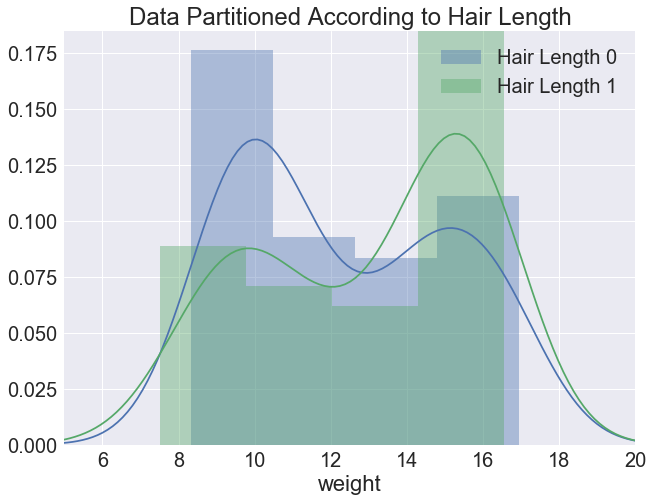

In [5]:
utils.plot_partition(dogs, "hair_length", "weight" )

Color indicates from which group
the data in the plot was drawn.

Notice how much less
"spread out"
the data in the groups based on breed is
than the data in groups based on hair length is?

We can quantify this notion of "spread",
as usual,
with the variance,
or the sum of squared differences from the mean.

Though the exact values are random,
we in general see that the variance in the groups based on breed
is substantially smaller than the original variance,
while the variance in the groups based on hair length
is around the same size.
You can also vary how much of an effect the breed has on weight
by changing the value of the `weight_effect`
argument to `produce_dog_dataframe`.
Large magnitudes should result in larger
differences in the variances.

This is the idea at the core of ANOVA:
if group membership has a strong effect on an observed variable,
then splitting the data up by group should reduce the variance substantially.
Below, we get more specific on in which cases
this "shoud" be true.
We define "substantially" as
"more than when splitting the data up by a labeling unrelated to the observation".
For the data above, our unrelated labeling was the hair length.
We can, however, also create random labels and use those.

We firm up this intuition with the section below on the
data model underlying ANOVA.

## The Implicit Model in ANOVA

When we use a one-way ANOVA to model our data,
we are implicitly choosing to model the dependent variable
as the sum of three things:
1. the **grand mean**,
or the average value of all observations,
1. the **group effect**, or the change in the average value due to being in that group,
which is the difference between that grand mean and the average of observations in a particular group,
1. and the sum of any **unknown effects**,
or changes to the observed variable due to things we didn't measure,
which is just the difference between the sum of the first two terms and the value that was observed.

Below, we take this English-language description and convert it into math.

$$\begin{align}
    &\text{Observation}\ j\ \text{in Group}\ i\ &= \ &\text{Grand Mean}\ &+\ &\text{Group Effect}_i\ &+ \ &\text{Unknown Effects}_{ij} \\
    &Y_{ij} &= \ &\mu_\text{grand} \ &+\ &A_i\ &+ \ &\epsilon_{ij}
\end{align}$$

where the index $i$ indicates which group the individual was in and the index $j$ tells us which individual within the group they were.

We then calculate a statistic of our data called the
$F$-statistic,
named in honor of its inventor,
[Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher).

This statistic is a ratio of the variance of the group effects
to the variance of the unknown effects.
Large values of $F$ are unlikely under the null hypothesis
that the size of the group effect is $0$.

To make this model tractable,
we have to assume something about these "unknown effects".
Into this category we lump everything that we did not measure,
everything that does not correspond to a group in our study,
but which can conceivably impact the observed value.
Appealing to the
[Central Limit Theorem](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem),
we say that the things we aren't measuring are
independent from each other and our groups,
large in number,
and individually have small effects on our observed variable,
and therefore the distribution of their impacts on the observed variable
is a Gaussian.

## When to Use ANOVA

The discussion above,
full of comparisons of means to baselines
and calculations of variances as yardsticks
reminds us of the $t$-test.

And indeed, the $t$-test is a particularly simple One-Way ANOVA,
with only two groups.
Running the $t$-test on our dog-breeds data
would give the same result as running an ANOVA.

One might then imagine that we don't need an ANOVA:
we simply use the $t$-test for data from each group
versus the rest of the data.

However, this requires us to perform multiple hypothesis tests.
Each time we perform a hypothesis test,
there is a chance of a false positive.

The utility of ANOVA comes from the fact that it lets us test
the hypothesis that the mean of at least one
of the levels of the variable we are using
to group our observations
is different from the overall mean
without specifying which level it is.

Once we've verified that this over-all null hypothesis is true,
we can more confidently perform additional $t$-tests
to narrow down just what exactly our data tells us.
Though diminished,
there are still concerns about multiple comparisons,
which we will cover in more depth
in the second ANOVA section.

## When Not to Use ANOVA

Our assumption about the distribution of the unobserved effects is frequently incorrect:
for example,
whether the participant is hungover or not
can have a very strong impact on their performance and
it is not independent of the age variable.
When we have rare effects that cause big changes in the observed value,
the result is *outliers*.
ANOVA is not robust to violations of the assumption
that there are no outliers,
but we won't be discussing alternatives in this course.

We also assume that the expected magnitude of the unknown effects
is the same for each group --
that the variance of the unknown effects
doesn't depend on the group.
The Greek term for "spread" is
*skedasis*, so if we assume that the spread,
or variance,
is the same across groups, we are assuming
*homoscedasticity*,
as opposed to
*heteroscedasticity*.
If your groups are all the same size,
then ANOVA is actually quite robust
to violations of this assumption.
See
[this discussion on CrossValidated](https://stats.stackexchange.com/questions/97098/practically-speaking-how-do-people-handle-anova-when-the-data-doesnt-quite-mee)
for more.

Define familywise error rate here?

# Implementing ANOVA

## Example Dataset

For the rest of this section's tutorial and lab, we'll be using some EEG data graciously provided by the [Voytek lab](http://voyteklab.com/about-us/) of UCSD. Participants of varying ages were asked to perform a working memory task with varying levels of difficulty. The raw EEG signal has been summarized into the following two measures:

* [Contralateral Delay Activity](https://www.ncbi.nlm.nih.gov/pubmed/26802451), or CDA, is used to measure the engagement of visual working memory.

* [Frontal Midline Theta](https://www.ncbi.nlm.nih.gov/pubmed/9895201) oscillation amplitude has been correlated with sustained, internally-directed cognitive activity.

The performance of the subjects has also been summarized using the measure
[d'](https://en.wikipedia.org/wiki/Sensitivity_index) (pronounced "d-prime"), also known as the *sensitivity index*. D' is a measure of the subject's performance in  a task. It's based on comparing the true positive rate and false positive rate.

## Loading the Data

In [6]:
df = pd.read_csv('./data/voytek_working_memory_aging_split.csv',index_col=None)

df.sample(5)

,idx,id,age_split,group,age,difficulty,d,cda,fmt
54,6,7,1,1,21,3,3.05,3.40,0.76
48,0,1,2,1,26,3,4.55,1.81,0.29
24,0,1,2,1,26,2,4.89,2.04,0.49
41,17,18,3,2,59,2,3.83,0.75,0.22
49,1,2,2,1,29,3,4.81,0.80,0.28


For the purposes of this lab, we're interested only in how task difficulty affects our three measures. We're uninterested in the subject's metadata -- `age_split`, `group`, `age`, and `idx`. Let's begin by dropping those columns from our dataframe using the DataFrame method `drop`.

In [7]:
data = df.drop(['age_split','group','age','idx'], axis=1)
data.sample(5)

,id,difficulty,d,cda,fmt
2,3,1,4.71,0.84,0.31
51,4,3,4.39,2.25,0.26
54,7,3,3.05,3.40,0.76
65,18,3,2.59,1.55,-0.18
43,20,2,2.88,1.87,-1.79


It's good practice to keep an original copy of your dataframe around (here, named `df`) so you can undo irreversible changes, like dropping columns.

## ANOVA by Hand

To get a better understanding of ANOVA,
we'll now implement it from scratch.

To get started,
you'll need the total number of observations $N$,
the group sizes
(here, each group is the same size),
and the keys for each group
(here, 1, 2, and 3, and they'rethe `unique` values of the `difficulty` variable).

The first cell picks a measure to run ANOVA on.
We'll want to write all of our code that follows in such a way
that we can run ANOVA on the other measures
just by changing this one cell.

In [8]:
measure = "cda"

In [9]:
N = len(data[measure])

groups = data["difficulty"].unique()

In [10]:
groups

array([1, 2, 3])

We'll proceed by generating a new data frame
that contains all the information we need to perform an ANOVA
-- each row will contain the grand mean and the group mean,
the group effect,
and the residual for that observation.
We will call this our `anova_frame`.

We also drop the other measures from this frame, to keep down on clutter.

In [11]:
anova_frame = data.copy().drop([unused_measure for unused_measure in ["cda", "d", "fmt"]
                                if measure != unused_measure], axis=1)

The cell below computes the grand mean
and the group mean for each difficulty level
and stores them in the `anova_frame`.

The precise defintions of the grand and group means appear below.

$$\begin{align}
\mu_\text{grand} &= \frac{1}{N}\sum_\text{dataset} Y_{ij} \\
\mu_{\text{group}_i} &= \frac{1}{N_{\text{group}_i}}\sum_{\text{group}_i} Y_{ij}
\end{align}$$

In [12]:
anova_frame["grand_mean"] = anova_frame[measure].mean()

group_means = anova_frame.groupby("difficulty")[measure].mean()

for group in groups:
    anova_frame.loc[anova_frame.difficulty==group,"group_mean"] = group_means[group]

Let's take a look at the resulting data frame.

In [13]:
anova_frame.sample(10)

,id,difficulty,cda,grand_mean,group_mean
31,8,2,1.38,1.474444,1.484167
19,20,1,0.65,1.474444,1.102917
33,10,2,1.36,1.474444,1.484167
57,10,3,1.84,1.474444,1.836250
63,16,3,1.22,1.474444,1.836250
51,4,3,2.25,1.474444,1.836250
41,18,2,0.75,1.474444,1.484167
52,5,3,0.98,1.474444,1.836250
37,14,2,1.52,1.474444,1.484167
7,8,1,0.45,1.474444,1.102917


There are only three unique values in the `group_mean` column, corresponding to the three group means. If we calculate their average value, we'll find that it is equal to the grand mean.

In [14]:
group_means = anova_frame["group_mean"].unique()

print(group_means)

np.mean(group_means) - anova_frame[measure].mean() < 1e-4

[ 1.10291667  1.48416667  1.83625   ]


True

This value is equal to the grand mean. If we know the grand mean, we only need two of the group means to know the other.

**degrees of freedom**


Now, we compute the explained and unexplained, or residual, components for each observation.
The explained differences are the differences between the group average and the overall average.
The unexplained difference is the difference between the individual score and the group average.

Above, these were called the "group effect" and the "unknown effect", respectively.
Terminology differs between authors.
Different terms correspond to different particular intuitions about ANOVA,
and we should be familiar with all of them.

$$\begin{align}
\text{Group Effect}_i &= \text{Explained Component}_i \\
            &= \mu_{\text{group}_i} - \mu_\text{grand}  \\
            \\
\text{Unknown Effects}_{ij} &= \text{Unexplained Component}_{ij} = \text{Residual}_{ij} \\
            &= Y_{ij} - \left(\text{Grand Mean}\ +\ \text{Group Effect}_i \right) \\
            &= Y_{ij} - \mu_{\text{group}_i}
\end{align}$$

In [15]:
anova_frame["explained"] = anova_frame["group_mean"]-anova_frame["grand_mean"]

anova_frame["residual"] = anova_frame[measure]-anova_frame["group_mean"]

In [16]:
anova_frame.sample(10)

,id,difficulty,cda,grand_mean,group_mean,explained,residual
65,18,3,1.55,1.474444,1.836250,0.361806,-0.286250
64,17,3,1.46,1.474444,1.836250,0.361806,-0.376250
63,16,3,1.22,1.474444,1.836250,0.361806,-0.616250
68,21,3,3.91,1.474444,1.836250,0.361806,2.073750
57,10,3,1.84,1.474444,1.836250,0.361806,0.003750
59,12,3,1.01,1.474444,1.836250,0.361806,-0.826250
42,19,2,1.13,1.474444,1.484167,0.009722,-0.354167
24,1,2,2.04,1.474444,1.484167,0.009722,0.555833
0,1,1,1.00,1.474444,1.102917,-0.371528,-0.102917
48,1,3,1.81,1.474444,1.836250,0.361806,-0.026250


To check our work, we confirm that the total value for each observation is equal to the sum of the grand mean, the explained component, and the residual.

In [17]:
np.isclose(anova_frame[measure],anova_frame["grand_mean"] 
                                + anova_frame["explained"]
                                  + anova_frame["residual"]).all()

True

This is a condition that is guaranteed by our model,
which states that any component of our observation that isn't explainable
as a deviation in group mean from the grand mean
is due to an unknown effect and is
to be left unexplained, or residual.

Review the implicit ANOVA model below and compare it to the `anova_frame` above.

$$\begin{align}
    &\text{Observation}\ j\ \text{in Group}\ i\ &= \ &\text{Grand Mean}\ &+\ &\text{Group Effect}_i\ &+ \ &\text{Unknown Effects}_{ij} \\
    &Y_{ij} &= \ &\mu_\text{grand} \ &+\ &A_i\ &+ \ &\epsilon_{ij}
\end{align}$$

Now that we have all of our components,
we need to compute their variances.
The general formula for computing the variance is

$$
\text{Variance}(\text{observed variable}) = \frac{1}{\text{degrees of freedom}} \sum \left(\text{observation}\ -\ \text{average of observations}\right)^2
$$

where everything except the inverse degrees of freedom
is called a
*sum of squares*,
for the obvious reason.

As a first step to calculating each variance,
we calculate several sums of squares.

Using the symbol $SS$ to stand for "sum of squares",
we define the following:

$$\begin{align}
SS_\text{Total} &= \sum_\text{dataset} Y_{ij}^2 \\
SS_\text{Grand Mean} &= \sum_\text{dataset} \mu_\text{grand}^2 \\
SS_\text{Explainable} = SS_\text{Total} - SS_\text{Grand Mean} 
                     &= \sum_\text{dataset} \left(Y_{ij} - \mu_\text{grand}\right)^2 \\
SS_{\text{Explained}} = \sum_\text{groups} SS_{\text{Group Effect}_i}
                     &= \sum_\text{groups} \sum_{\text{group}_i} A_i^2 \\
SS_{\text{Residual}} = SS_\text{Explainable} - SS_\text{Explained}
                     &= \sum_\text{dataset} \left(Y_{ij} - A_i - \mu_{grand}\right)^2
\end{align}$$

also known as the total sum of squares, sum of the grand mean squared,
the sum of squares that can be explained by a model,
the sum of squares that were explained by the model,
and the residual sum of squares.

Several of the equations above, like the one relating
the explainable sum of squares to the total and grand mean sums of squares,
can be used to determine whether we've done our calculations correctly.
The assertion statements in the code cell under the next check this.

We'll store the sums of squares in a dictionary, `sum_of_squares`, using the column name as the key.

In [18]:
sum_of_squares = {}

keys = [measure,"grand_mean","explained","residual"]

for key in keys:
    sum_of_squares[key] = np.sum(np.square((anova_frame[key])))
    
sum_of_squares["explainable"] = sum_of_squares[measure] - sum_of_squares["grand_mean"]

In [19]:
#these should be the same, except for computer rounding error

assert( sum_of_squares[measure] - (sum_of_squares["grand_mean"] + 
                                 sum_of_squares["explainable"]) <= 1e-4 )

assert( sum_of_squares["explainable"] - (sum_of_squares["explained"] +
                                       sum_of_squares["residual"]) <= 1e-4 )

In [20]:
sum_of_squares

{'cda': 204.53820000000002,
 'explainable': 48.011177777777817,
 'explained': 6.4567361111111206,
 'grand_mean': 156.5270222222222,
 'residual': 41.554441666666669}

If we use an alternative formula for variance:

$$\begin{align}
\text{Variance}(X) = \frac{1}{\text{degrees of freedom}} \left( SS(X) - SS(\mu_X) \right)
\end{align}$$

we see that our explained sum of squares, 
$$SS_\text{Explained} = SS_\text{Group Means} - SS_\text{Grand Mean} $$
is ready to be turned into a variance.

In addition, the mean of the residuals is by definition $0$,
so the variance of the residuals is just
$$\frac{1}{\text{degrees of freedom}}SS_{\text{Residual}}$$
and so we also only need to divide by degrees of freedom to get the variance.

Since both of these variances are calculated by averaging sums of squares,
they are also called *mean squares*.

The total degrees of freedom is the number of observations, $N$.

Each time we use a degree of freedom, we subtract from our total available.
When we are done, we have no degrees of freedom left.

Calculating the grand mean takes away one degree of freedom:
if we know the grand mean AND $N-1$ of the data values,
then we know the missing value.

Calculating the $k$ different group means,
which gave us our explained components,
takes away $k-1$ degrees of freedom.
If we know the grand mean AND $k-1$ of the group means,
then we know the missing group mean.

The remaining degrees of freedom are used by the residuals.
If we write the process of subtraction out,
we get

$$
\text{residual degrees of freedom} = N - 1 - (k-1) = N - 1 - k + 1 = N - k
$$

The cell below calculates these degrees of freedom
and places them in a dictionary
called `dof`.

As a sanity check, the assert statement below
checks that the sum of the other degrees of freedom
is equal to the total degrees of freedom.

In [21]:
# k is the number of groups
k = len(groups)

dof = {}
vals = [N,1,k-1,N-k]

for key,val in zip(keys,vals):
    dof[key] = val

In [22]:
dof

{'cda': 72, 'explained': 2, 'grand_mean': 1, 'residual': 69}

In [23]:
assert(sum([dof[key] for key in dof.keys()
                       if key is not measure]) == dof[measure])

Now, we calculate our estimate for the variance of the explained and unexplained components.

In [24]:
variance = {}

for key in ["explained","residual"]:
    variance[key] = sum_of_squares[key]/dof[key]

In [25]:
variance

{'explained': 3.2283680555555603, 'residual': 0.60223828502415466}

The variance of the explained component tells us how much, on average, our hypothesis is able to improve, in terms of squared error, our guess of the value of our outcome variable over the "null" hypothesis. The bigger this is, the more supported our hypothesis is, and the less likely we are to have observed such a result if the null hypothesis were true.

However,
a variance by itself doesn't tell you much 
-- is reduction of 2 in mean squared error a "big" improvement?
For our data, it would be,
but for data with units in the billions and spread in the millions,
it would not be.
Therefore,
if we want a statistic that tells us how good our hypothesis is,
we need to somehow take into account the amount of unexplained variance.

The statistic used for this purpose in ANOVA is
the *$F$-statistic*,
named in honor of its inventor,
[Sir Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher).
We compute the value of $F$ for this data below.

In [26]:
F = variance["explained"]/variance["residual"]

F

5.3606157825487237

In
[the lab for this section](./Lab - One-Way ANOVA.ipynb),
we will first walk through the versions of ANOVA
provided by the `scipy` and `statsmodels`
packages,
then extend the "homemade" approach above
to calculating $p$ values and effect sizes.